In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data Describtion

## DX

No Cancer:
    
bkl = benign keratosis-like lesions→ common noncancerous (benign) skin growth

df = dermatofibroma → common noncancerous (benign) skin growths

vasc = vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc) → relatively common abnormalities of the skin and underlying tissues, more commonly known as birthmarks

Cancer:
    
nv = melanocytic nevi → type of melanocytic tumor that contains nevus cells

mel = melanoma → serious form of skin cancer that begins in cells known as melanocytes

bcc =  basal cell carcinoma → a type of skin cancer

akiec = Actinic keratoses and intraepithelial carcinoma / Bowen's disease → comprise the spectrum of premalignant and malignant keratinizing tumors

## DX TYPE

→ confirmed through histopathology (histo)

→ follow-up examination (followup)

→ expert consensus (consensus)

→ confirmation by in-vivo confocal microscopy (confocal)

# Data Set

In [2]:
data = pd.read_csv("../raw_data/HAM10000_metadata.csv")
data.head(2)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp


## Lesion ID

In [3]:
data['lesion_id'].value_counts()

HAM_0003789    6
HAM_0000835    6
HAM_0005263    6
HAM_0001863    6
HAM_0007427    5
              ..
HAM_0006000    1
HAM_0002762    1
HAM_0006894    1
HAM_0007132    1
HAM_0003347    1
Name: lesion_id, Length: 7470, dtype: int64

### Lesion ID Distribution

In [4]:
x1 = data['lesion_id'].value_counts()==1

In [5]:
x2 = data['lesion_id'].value_counts()==2

In [6]:
x3 = data['lesion_id'].value_counts()==3

In [7]:
x4 = data['lesion_id'].value_counts()==4

In [8]:
x5 = data['lesion_id'].value_counts()==5

In [9]:
x6 = data['lesion_id'].value_counts()==6

In [10]:
dictio = {1:x1.sum(),2:x2.sum(),3:x3.sum(),4:x4.sum(),5:x5.sum(),6:x6.sum()}

In [11]:
num = list(dictio.keys())
values = list(dictio.values())

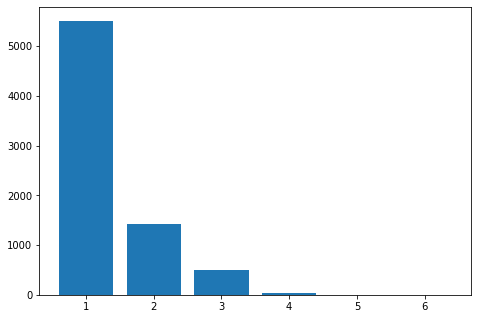

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
num
values
ax.bar(num,values)
plt.show()

## dx Distribution

In [13]:
data['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [14]:
data['dx'].describe()

count     10015
unique        7
top          nv
freq       6705
Name: dx, dtype: object

# Grouped Data Set

In [15]:
data.groupby(by=data['lesion_id']).agg({'dx':'count'}).reset_index()

,lesion_id,dx
0,HAM_0000000,2
1,HAM_0000001,1
2,HAM_0000002,3
3,HAM_0000003,1
4,HAM_0000004,1
...,...,...
7465,HAM_0007624,1
7466,HAM_0007625,2
7467,HAM_0007626,1
7468,HAM_0007627,2


In [16]:
data.groupby(by=data['lesion_id']).agg({'dx':'count'}).reset_index()

,lesion_id,dx
0,HAM_0000000,2
1,HAM_0000001,1
2,HAM_0000002,3
3,HAM_0000003,1
4,HAM_0000004,1
...,...,...
7465,HAM_0007624,1
7466,HAM_0007625,2
7467,HAM_0007626,1
7468,HAM_0007627,2


In [17]:
#data[data['lesion_id'].value_counts()==1]

In [18]:
counted_df=data.groupby(by=data['lesion_id']).count().reset_index()

In [19]:
counted_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000000,2,2,2,2,2,2
1,HAM_0000001,1,1,1,1,1,1
2,HAM_0000002,3,3,3,3,3,3
3,HAM_0000003,1,1,1,1,1,1
4,HAM_0000004,1,1,1,1,1,1
...,...,...,...,...,...,...,...
7465,HAM_0007624,1,1,1,1,1,1
7466,HAM_0007625,2,2,2,2,2,2
7467,HAM_0007626,1,1,1,1,1,1
7468,HAM_0007627,2,2,2,2,2,2


# Merging Data Sets

## Dropping Duplicates

Difference if dropping duplicates in lesion_id & dx_type or just in lesion_id?

Answer: NO!

In [20]:
data_dropped_dup = data.drop_duplicates(subset=['lesion_id', 'dx_type'], keep='first')

In [21]:
data_dropped_dup['lesion_id'].describe()

count            7470
unique           7470
top       HAM_0000118
freq                1
Name: lesion_id, dtype: object

In [22]:
data_dropped_dup_alt = data.drop_duplicates(subset=['lesion_id'], keep='first')

In [23]:
data_dropped_dup_alt['lesion_id'].describe()

count            7470
unique           7470
top       HAM_0000118
freq                1
Name: lesion_id, dtype: object

In [24]:
data_dropped_dup.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')

In [25]:
counted_df.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')

## Merge Data Sets

Joining the Data set without duplicates with the column that tells us how many duplicates (images) there were for each lesion_id

In [26]:
joined_dataset = data_dropped_dup.merge(counted_df,on='lesion_id',how='left')

In [28]:
joined_dataset.drop(columns=['dx_y', 'dx_type_y', 'age_y', 'sex_y', 'localization_y'],axis=1, inplace=True)

In [34]:
joined_dataset.head(2)

,lesion_id,image_id_x,dx_x,dx_type_x,age_x,sex_x,localization_x,image_id_y
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2
1,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2


## Add Cancer Column

In [33]:
Cancer = {'bkl':0,'df':0,'vasc':0,'nv':1,'mel':1,'bcc':1,'akiec':1}

In [ ]:
joined_dataset['Cancer']

# Analysis